# DecisionTree Classifier

__정보의 균일도로 규칙노드 설정__
- 정보의 균일도 구하는 방법에는 지니계수와 엔트로피를 활용한 information gain 지수 두 가지가 있다.

__예시를 통해 알아보는 지니계수와 엔트로피지수 구하는 방법__

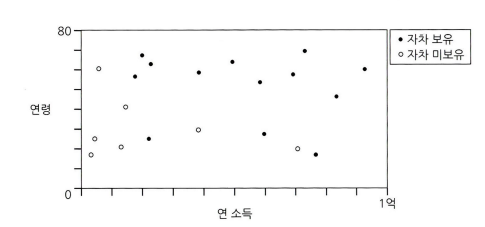

- 1. 지니계수 구하는 방법
    - 1에서 전체 관측치 수 중에서 각 카테고리가 차지하는 수의 비율을 제곱해서 빼주기
    - 1) 자차 보유/ 미보유로 분류 시
        - 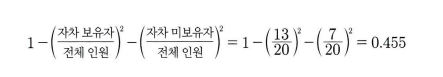
    
    - 2) 45세 연령 이상/미만 으로 분류 시
        - 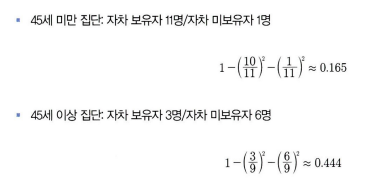

    - 3) 기존 지니계수에서 빼주기
        - 문제 : 그대로 빼주게 되면 분류된 집단이 많아질수록 지니계수가 너무 커져버리게 되는 문제 발생
        - 해결 : 데이터의 비율만큼 가중치 부여 (=집단의 크기가 작을수록 지니계수의 영향력도 작아지도록)
        - 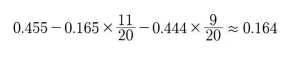


- 2. 엔트로피 구하는 방법
    - 지니 계수와 비슷하지만 이진로그(Binary logarithm)를 취함으로써 정규화 과정을 거치게 된다. (값의 범위는 0~1)
    - 엔트로피는 0에서 전체 관측치 수 중에서 각 카테고리가 차지하는 수의 비율에 이진로그를 취한 동일한 비율을 곱한 값을 빼주면 된다. 
    - 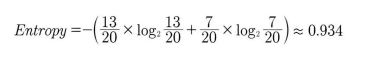
    - 데이터 비율의 가중치를 주어 구할 수 있다. 


***********
## Glass Classification dataset

### 1. 패키지 설치 및 데이터 로드

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import seaborn as sb
import matplotlib.pyplot as plt
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image

from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


> 결측치 x. 모든 칼럼이 숫자형<br>
> 분류모델을 만들 것이기 때문에 종속변수 Type을 문자형 변수로 만들어주어야 한다. 

### 2. 전처리

In [12]:
# 종속변수를 문자형으로 변환
df['Type'] = df['Type'].apply(str)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


### 3. 학습, 테스트 셋 분리

In [20]:
# 의사결정나무 모델용 데이터셋 가공

# 독립변수, 종속변수 분리
df_y = df[['Type']]
df_x = df[df.columns.difference(['Type'])]

# 학습셋과 테스트셋 분리하여 생성(6:4)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state=10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(128, 9) (128, 1)
(86, 9) (86, 1)


### 4. 의사결정나무 모델링 (max_depth=5, criterion='entropy')

In [21]:
# 의사결정나무 모델
df_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
df_clf.fit(x_train, y_train)

pred = df_clf.predict(x_test)

print('의사결정나무 예측 정확도:', accuracy_score(y_test, pred))

의사결정나무 예측 정확도: 0.6162790697674418


### 5. GridSearchCV를 활용하여 최적의 하이퍼 파라미터 찾기

In [24]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(df_clf, 
                       param_grid={'max_depth':[5,7,9,11], 'min_samples_split':[10,12,15,18]},
                       scoring='accuracy',
                       cv=5, 
                       verbose=1)

grid_cv.fit(x_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치:', grid_cv.best_score_)
print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)
grid_cv.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
GridSearchCV 최고 평균 정확도 수치: 0.6492307692307693
GridSearchCV 최적 파라미터: {'max_depth': 7, 'min_samples_split': 10}


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10)

> max_depth = 7, min_samples_split=10일때 정확도가 제일 높은 것으로 확인

In [36]:
# grid_cv.cv_results로 확인해보기
result_df = pd.DataFrame(grid_cv.cv_results_)
result_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score']]

,param_max_depth,param_min_samples_split,mean_test_score
0,5,10,0.641538
1,5,12,0.641538
2,5,15,0.641538
3,5,18,0.633846
4,7,10,0.649231
5,7,12,0.625846
6,7,15,0.625538
7,7,18,0.633538
8,9,10,0.626154
9,9,12,0.625846


### 6. 의사결정나무 모델링(max_depth=7, min_samples_split=10으로 설정)

In [37]:
df_clf2 = DecisionTreeClassifier(max_depth=7, min_samples_split=10, criterion='entropy')
df_clf2.fit(x_train, y_train)

pred = df_clf2.predict(x_test)
print('하이퍼파라미터를 적용한 의사결정나무의 정확도:', accuracy_score(y_test, pred))

하이퍼파라미터를 적용한 의사결정나무의 정확도: 0.5813953488372093


> 왜 떨어졋지..?

1. 과적합(Overfitting)의 감소: 원래 모델(max_depth=5, criterion='entropy')이 훈련 데이터에 과적합되었을 가능성이 있습니다. 새로운 파라미터(max_depth=7, min_samples_split=10, criterion='entropy')로 모델링을 진행했을 때, 과적합이 감소하여 훈련 데이터에 대한 정확도는 떨어졌을 수 있지만, 이는 모델이 테스트 데이터나 보이지 않는 데이터에 대해 더 잘 일반화될 수 있다는 의미일 수 있습니다.

2. 데이터의 변동성(Data Variability): GridSearchCV 과정에서 사용된 데이터 분할이나 크로스 밸리데이션의 특정 폴드들은 우연히 모델이 잘 맞는 특정한 패턴을 가질 수 있습니다. 최적의 파라미터를 찾았다고 해도, 이 설정이 다른 데이터 분할이나 미래의 데이터에 대해 최적이라는 보장은 없습니다. 즉, 새로운 파라미터 설정이 이전보다 더 일반적이지 않을 수 있으며, 이로 인해 성능이 떨어질 수 있습니다.

3. 최적의 파라미터 선택의 복잡성: GridSearchCV가 반환한 "최적"의 파라미터는 교차 검증 점수에 기반한 것입니다. 이 점수는 평균적인 성능을 나타내지만, 모델의 성능은 다양한 외부 요인(데이터의 분포 변화, 특성의 중요도 변화 등)에 의해 영향을 받을 수 있습니다. 따라서, GridSearchCV로 찾은 파라미터가 모든 상황에서 최적이라고 할 수는 없습니다.

4. 평가 방법의 차이: 모델의 성능을 평가할 때 사용된 메트릭이나 데이터 분할 방식이 GridSearchCV 과정과 모델 재학습 과정에서 달랐을 수 있습니다. 예를 들어, GridSearchCV에서 사용된 크로스 밸리데이션의 데이터 분할 방식이 최종 모델 평가 때와 다르면, 성능 차이가 발생할 수 있습니다.

5. 하이퍼파라미터의 범위와 세분성: GridSearchCV 과정에서 탐색한 하이퍼파라미터의 범위나 간격이 최적값을 찾기에 충분히 세분화되지 않았을 수 있습니다. 때로는 더 넓은 범위나 더 세밀한 간격으로 하이퍼파라미터 탐색을 수행해야 최적의 결과를 얻을 수 있습니다.

In [41]:
# 의사결정나무 변수 중요도 확인
pd.DataFrame({'feature':df_x.columns, 'feature_importances': df_clf2.feature_importances_})

,feature,feature_importances
0,Al,0.162479
1,Ba,0.027528
2,Ca,0.140419
3,Fe,0.000000
4,K,0.000000
5,Mg,0.336730
6,Na,0.055476
7,RI,0.121917
8,Si,0.155452


> 값이 클수록 분류에 강한 영향을 미친다. <br>
> Mg > Al > Si 순으로 분류에 영향을 미치는 것으로 확인

### 7. 의사결정나무 시각화

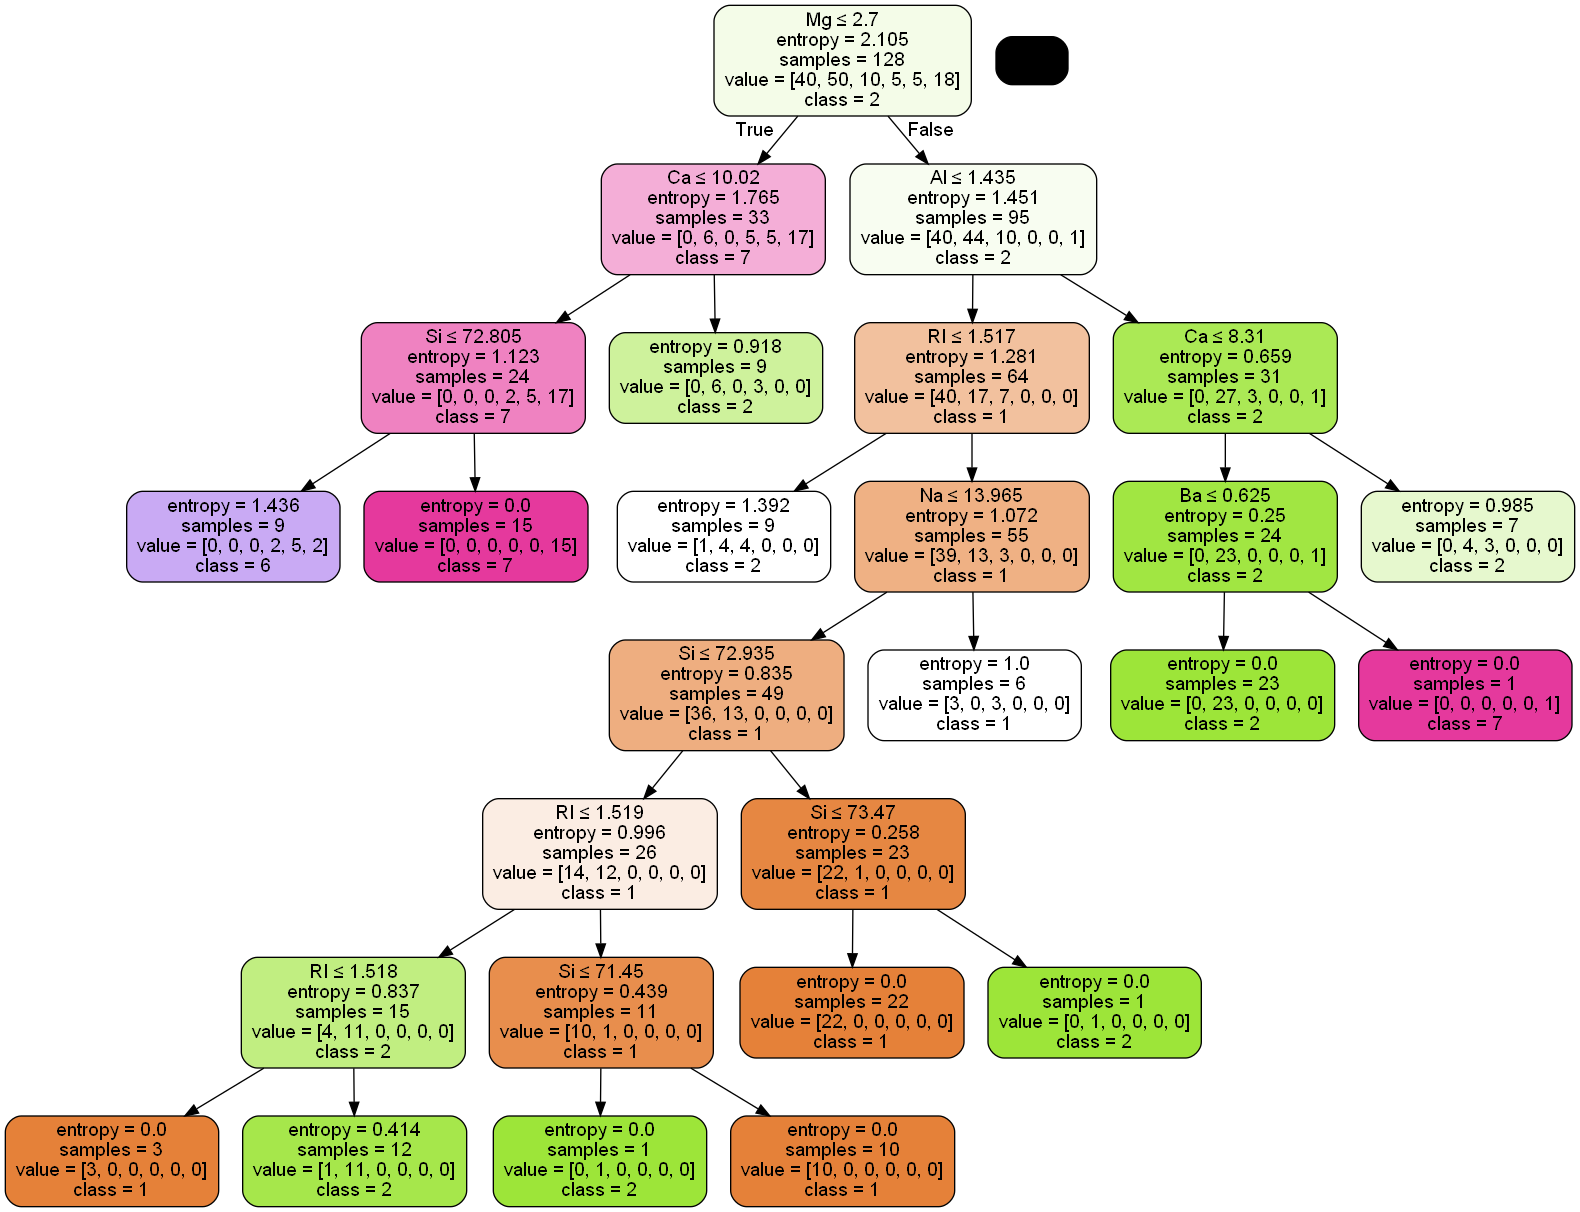

In [43]:
dot_data = export_graphviz(df_clf2, out_file=None, 
                           feature_names=x_train.columns,
                           class_names=df_clf2.classes_,
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())